In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

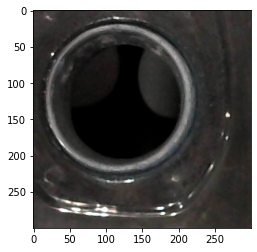

In [178]:
img = cv.imread('templates/platina.png')
# img_crop =img[200:510,260:680]
img_crop =img[200:500,260:560]
# img_crop = img
x_crop = 200
y_crop = 2
plt.imshow(img_crop)
img2 = img_crop.copy()

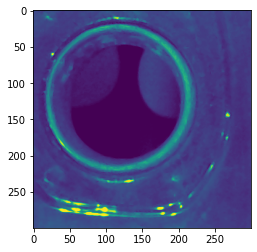

In [180]:
gray = cv.cvtColor(img_crop, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

In [172]:
circles = cv.HoughCircles(img_crop, cv.HOUGH_GRADIENT, 1.2, 100)

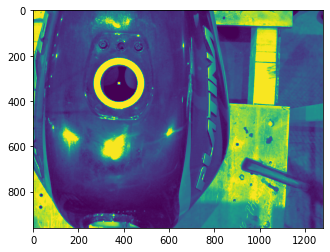

In [173]:
# output = img_crop.copy()
output = img
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
#     Add removed x and y
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv.circle(output, (x+260, y+200), r, (255, 255, 255), 30)
		cv.rectangle(output, (x+260 - 5, y+200 - 5), (x+260 + 5, y+200 + 5), (255, 255, 255), -1)
	# show the output image
	plt.imshow(output)

In [177]:
len(circles)

1

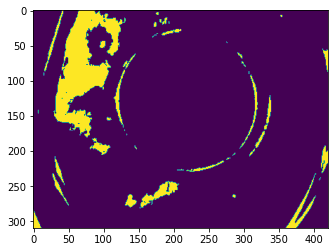

In [112]:
img_cont = img_crop.copy()
imgray = cv.cvtColor(img_cont, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 150, 255, 0)
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# cv.drawContours(img_cont, contours[6], -1, (0,255,0), 3)
plt.imshow(thresh)

In [105]:
contour_list = []
i = 0
for contour in contours:
    approx = cv.approxPolyDP(contour,0.01*cv.arcLength(contour,True),True)
    area = cv.contourArea(contour)
    print(len(approx), i)
    i = i+1
#     if ((len(approx) > 8) & (area > 30) ):
#         contour_list.append(contour)

1 0
7 1
4 2
1 3
10 4
6 5
22 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
6 15
4 16
4 17
10 18
5 19
7 20
1 21
4 22
2 23
11 24
4 25
6 26
4 27
2 28
2 29
11 30
4 31
7 32
2 33
9 34
1 35
10 36
6 37
12 38
2 39
1 40
16 41
1 42
2 43
2 44
9 45
1 46
1 47
9 48
2 49
1 50
1 51
8 52
9 53
4 54
1 55
12 56
4 57
4 58
14 59
6 60
5 61
14 62
9 63
12 64
8 65
14 66
5 67
2 68
2 69
1 70
19 71
2 72
3 73
15 74
13 75
1 76
6 77
5 78
1 79
7 80
7 81
20 82
4 83
1 84
6 85
2 86
11 87
14 88
10 89
16 90
9 91
4 92
4 93
8 94
8 95
1 96
8 97
1 98
1 99
14 100
4 101
3 102
2 103
1 104
9 105
10 106
5 107
1 108
7 109
4 110
9 111
1 112
4 113
4 114
1 115
2 116
14 117
7 118
7 119
1 120
9 121
13 122
11 123
4 124
7 125
2 126
8 127
2 128
14 129
7 130
1 131
6 132
10 133
6 134
8 135
9 136
1 137
1 138
1 139
1 140
5 141
1 142
1 143
18 144
6 145
6 146
4 147
4 148
5 149
4 150
4 151
11 152
6 153
4 154
6 155
4 156
4 157
4 158
4 159
6 160
4 161
4 162
6 163
7 164
4 165
4 166
4 167
6 168
4 169
4 170
6 171
4 172
4 173
4 174
6 175
5 176
6 177
4 178
4 179


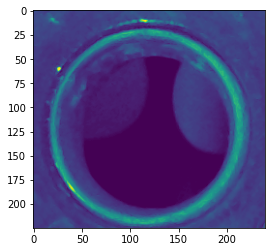

In [125]:
template = cv.imread('platina_hole.png',0)
plt.imshow(template)
w, h = template.shape[::-1]

43869736.0


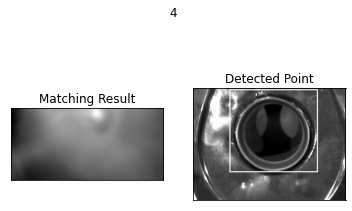

In [126]:
method = 'cv.TM_CCOEFF'

img = img2.copy()
method = eval(method)

res = cv.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
print(max_val)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(method)
plt.show()

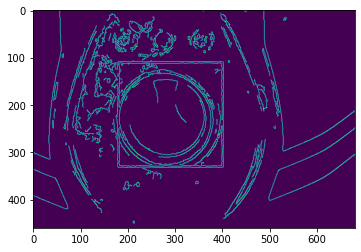

In [89]:
edges = cv.Canny(img, 100, 200)
plt.imshow(edges)

In [ ]:
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)
